# **Detect Malicious URL using ML**
## **使用ML models檢測惡意的網址URL**


### **使用資料集為 Malicious URLs dataset**
#### 關於此資料集
危險的URL或危險網站是對網路安全的非常嚴重的威脅。危險的URL 託管未經請求的內容（垃圾郵件、網路釣魚等）並引誘毫無戒心的用戶成為詐騙的受害者（金錢損失、私人信息被盜和惡意軟體安裝），每年造成數十億美元的損失. 我們收集了這個數據集以包含大量惡意URL的示例，以便開發基於機器學習的模型來識別惡意URL，以便我們可以在感染電腦系統或通過互聯網傳播之前提前阻止它們。

<h2 style="width: 100%;
    text-align: center;">---- 目錄 ----</h2>

1. Importing Libraries
2. Load Dataset
3. Meta information of Dataframe
4. Checking for NaN values
5. Feature Extraction
6. Train & Test Split
7. Training models
8. Final Report

## **Importing Libraries**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

/kaggle/input/malicious-and-benign-urls/urldata.csv


## **Load Dataset**

In [2]:
urldata = pd.read_csv("/kaggle/input/malicious-and-benign-urls/urldata.csv", index_col=[0])

In [3]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


## **Meta information of Dataframe**

In [4]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.7+ MB


In [5]:
urldata.describe(include = 'all')

,url,label,result
count,450176,450176,450176.000000
unique,450176,2,NaN
top,https://www.google.com,benign,NaN
freq,1,345738,NaN
mean,NaN,NaN,0.231994
std,NaN,NaN,0.422105
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,0.000000


Text(0, 0.5, 'Number of URLs')

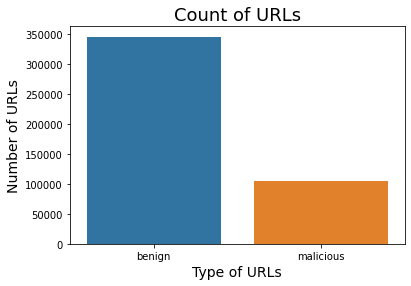

In [6]:
sns.countplot(x='label',data=urldata)
plt.title("Count of URLs",fontsize=18)
plt.xlabel("Type of URLs",fontsize=14)
plt.ylabel("Number of URLs",fontsize=14)

## **Checking for NaN values**

In [7]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

資料集無缺失值

## **Feature Extraction**

The following features will be extracted from the URL for classification. <br>
<ol>
    <li>Length Features
    <ul>
        <li>Length Of Url</li>
        <li>Length of Hostname</li>
        <li>Length Of Path</li>
    </ul>
    </li>
    <br>
   <li>Count Features
    <ul>
    <li>Count Of '@'</li>
    <li>Count Of '?'</li>
    <li>Count Of '-'</li>
    <li>Count Of '='</li>
    <li>Count Of '.'</li>
    <li>Count Of '#'</li>
    <li>Count Of '%'</li>    
    <li>Count Of '+'</li>
    <li>Count Of '$'</li>
    <li>Count Of '!'</li>    
    <li>Count Of '*'</li>   
    <li>Count Of ','</li>    
    <li>Count Of 'http'</li>
    <li>Count Of 'https'</li>
    <li>Count Of 'www'</li>
    <li>Count Of Digits</li>
    <li>Count Of Letters</li>
    <li>Count Of Number Of Directories</li>
    </ul>
    </li>
    <br>
    <li>Binary Features
    <ul>
        <li>Use of IP or not</li>
        <li>Use of Shortening URL or not</li>
    </ul>
    </li>
    
</ol>



**1. Length Features**

In [8]:
#URL長度
urldata['url_len'] = urldata['url'].apply(lambda x: len(str(x)))

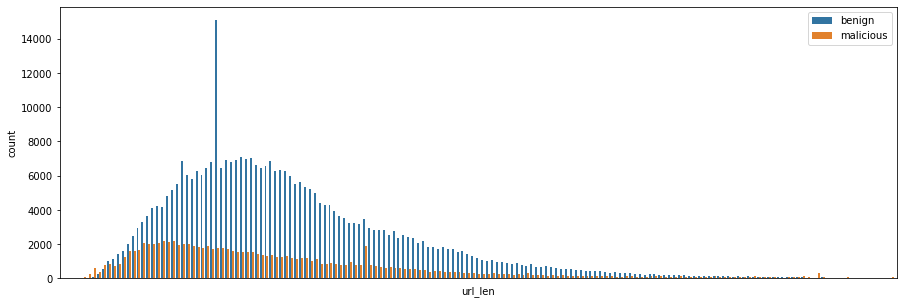

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='url_len', hue="label", data=urldata)
plt.xticks([])
plt.xlim(0, 170)
plt.legend(loc = 'upper right')

In [10]:
urldata['url_len'].value_counts()

43      16884
36       8861
45       8664
48       8605
42       8548
        ...  
660         1
635         1
1153        1
490         1
435         1
Name: url_len, Length: 609, dtype: int64

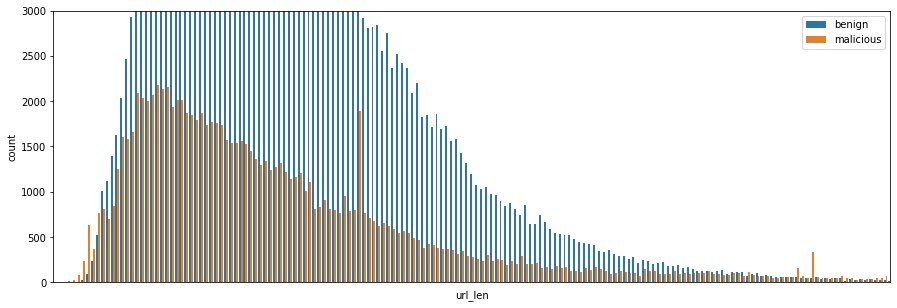

In [11]:
#放大檢視
plt.figure(figsize=(15,5))
sns.countplot(x='url_len', hue="label", data=urldata)
plt.xticks([])
plt.xlim(0, 170)
plt.ylim(0, 3000)
plt.legend(loc = 'upper right')

In [12]:
#netloc長度(內容包含帳號密碼、網域名稱及通訊阜)
urldata['netloc_len'] = urldata['url'].apply(lambda x: len(urlparse(x).netloc))

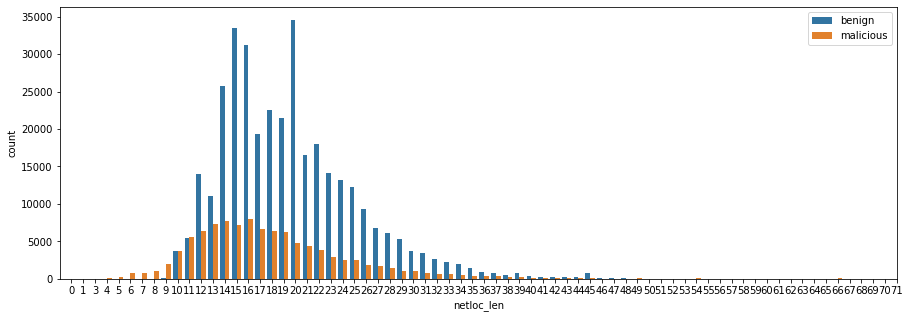

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='netloc_len', hue="label", data=urldata)
plt.xlim(-1, 70)
plt.legend(loc = 'upper right')

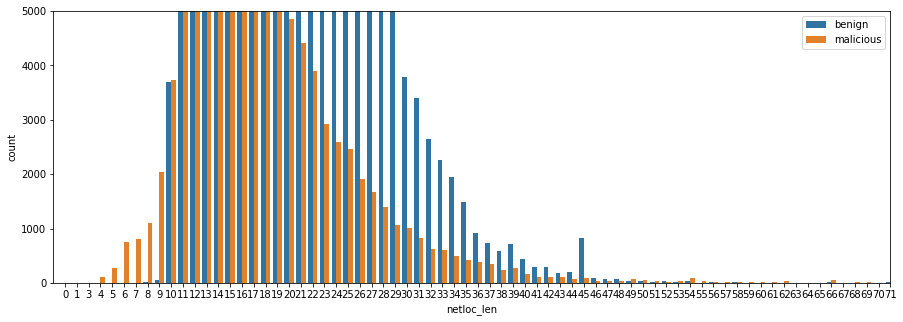

In [14]:
#放大檢視
plt.figure(figsize=(15,5))
sns.countplot(x='netloc_len', hue="label", data=urldata)
plt.xlim(-1, 70)
plt.ylim(0, 5000)
plt.legend(loc = 'upper right')

In [15]:
#path長度
urldata['path_length'] = urldata['url'].apply(lambda x: len(urlparse(x).path))
urldata['path_length'].value_counts()

1      55253
6      12653
16     11806
15     11023
17     10653
       ...  
260        1
265        1
264        1
275        1
915        1
Name: path_length, Length: 304, dtype: int64

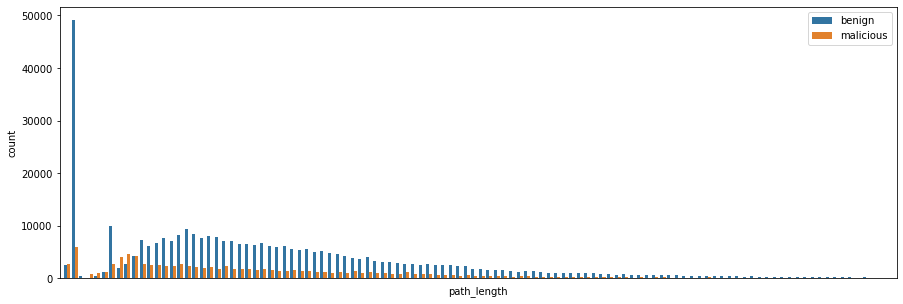

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='path_length', hue="label", data=urldata)
plt.xticks([])
plt.xlim(-1, 110)
plt.legend(loc = 'upper right')

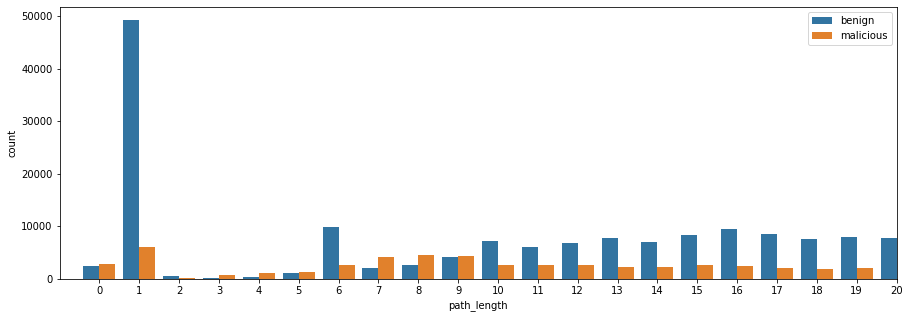

In [17]:
#放大檢視
plt.figure(figsize=(15,5))
sns.countplot(x='path_length', hue="label", data=urldata)
plt.xlim(-1, 20)
plt.legend(loc = 'upper right')

In [18]:
urldata.head()

,url,label,result,url_len,netloc_len,path_length
0,https://www.google.com,benign,0,22,14,0
1,https://www.youtube.com,benign,0,23,15,0
2,https://www.facebook.com,benign,0,24,16,0
3,https://www.baidu.com,benign,0,21,13,0
4,https://www.wikipedia.org,benign,0,25,17,0


**2. Counts Features**

In [19]:
#對各個特殊字元進行數量統計
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','/','//']
for a in feature:
    urldata[a] = urldata['url'].apply(lambda x: x.count(a))

* Count?： URL 中出現符號 ( ? ) 表示包含要傳遞給服務器的數據的查詢字符串。更多的？在 URL 中肯定表示可疑 URL。

(0.0, 3000.0)

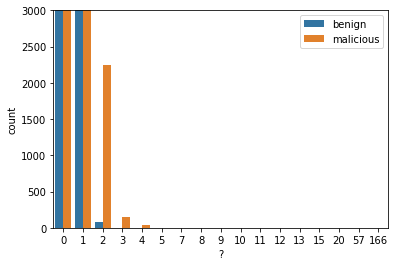

In [20]:
sns.countplot(x='?', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.ylim(0, 3000)

* Count-：網路釣魚或網路犯罪分子通常會在品牌名稱的前綴或後綴中添加破折號 (-)，使其看起來像真正的 URL。
例如 'www.flipkart-india.com'

(-1.0, 20.0)

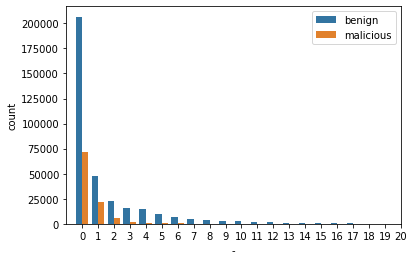

In [21]:
sns.countplot(x='-', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.xlim(-1, 20)

* Count=：  URL 中出現等於 (=) 表示將變量值從一個表單頁面傳遞到另一個表單頁面。它被認為在 URL 中風險更高，因為任何人都可以更改值來修改頁面。

(0.0, 5000.0)

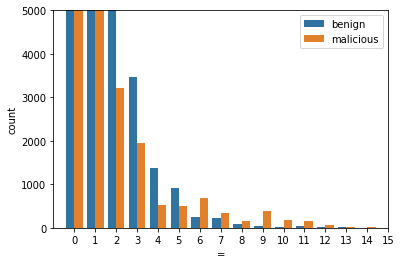

In [22]:
sns.countplot(x='=', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.xlim(-1, 15)
plt.ylim(0, 5000)

* Count . :網路釣魚或惡意軟件網站通常在 URL 中使用較多的子域。每個域由點 "." 分隔。如果任何 URL 包含五個以上的 "." ，則會增加惡意站點的可能性。

(0.0, 5000.0)

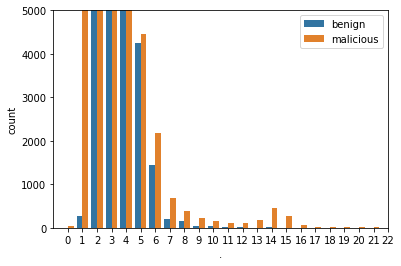

In [23]:
sns.countplot(x='.', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.xlim(-1, 22)
plt.ylim(0, 5000)

* Count%： URL 不能包含空格。URL 編碼通常用符號 ( % )替換空格。安全站點通常包含較少數量的空格，而惡意網站通常在其 URL 中包含更多空格，因此%的數量更多。

(0.0, 50.0)

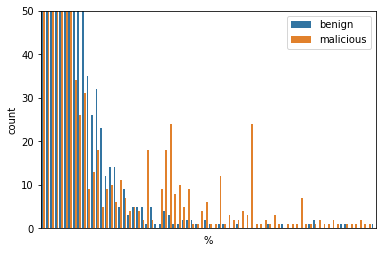

In [24]:
sns.countplot(x='%', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.xticks([])
plt.ylim(0, 50)

In [25]:
#統計 'http' 字串
urldata['http'] = urldata['url'].apply(lambda x : x.count('http'))

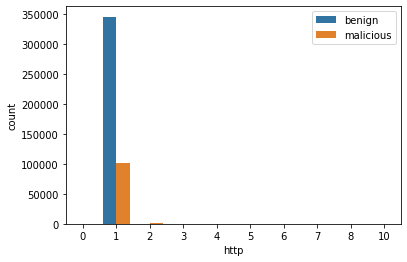

In [26]:
sns.countplot(x='http', hue="label", data=urldata)
plt.legend(loc = 'upper right')

* 大多數時候，網路釣魚或惡意網站的 URL 中有多個 HTTP，而安全站點只有一個 HTTP。

(0.0, 700.0)

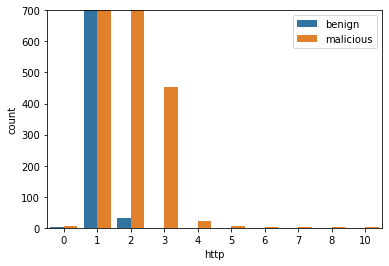

In [27]:
#放大檢視
sns.countplot(x='http', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.ylim(0,700)

In [28]:
#統計 'https' 字串
urldata['https'] = urldata['url'].apply(lambda x : x.count('https'))

* 通常惡意 URL 不使用 HTTPS 協議，因為它通常需要用戶憑據並確保網站的交易安全。因此，URL 中是否存在 HTTPS 協議是一個重要特徵。

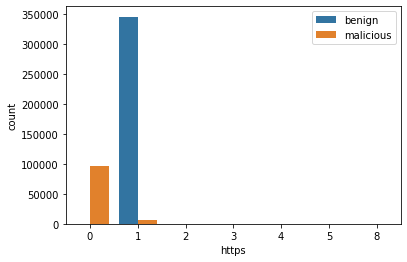

In [29]:
sns.countplot(x='https', hue="label", data=urldata)
plt.legend(loc = 'upper right')

(0.0, 1000.0)

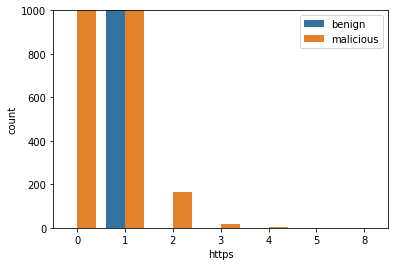

In [30]:
#放大檢視
sns.countplot(x='https', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.ylim(0,1000)

In [31]:
#統計 'www' 字串
urldata['www'] = urldata['url'].apply(lambda x : x.count('www'))

* 一般大部分安全網站的URL中都有一個www。如果 URL 中沒有 www，此功能有助於檢測惡意網站。

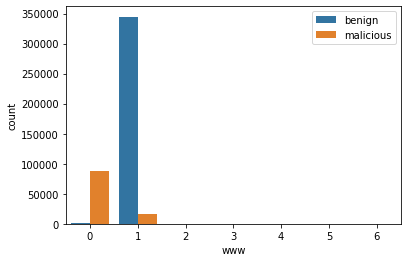

In [32]:
sns.countplot(x='www', hue="label", data=urldata)
plt.legend(loc = 'upper right')

(0.0, 500.0)

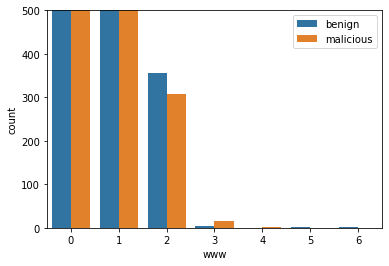

In [33]:
sns.countplot(x='www', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.ylim(0, 500)

In [34]:
#統計 URL 中數字長度
def digit_count(url):
    num = 0
    for i in url:
        if i.isnumeric():
            num += 1
    return num
urldata['digits'] = urldata['url'].apply(lambda x : digit_count(x))

([], [])

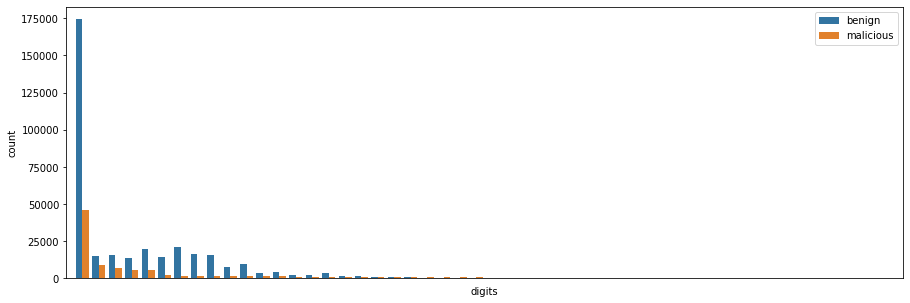

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='digits', hue="label", data=urldata)
plt.xlim(-1, 50)
plt.legend(loc = 'upper right')
plt.xticks([])

* Count_digits：  URL 中出現數字過多通常表示可疑 URL。安全 URL 通常數字較少，因此計算 URL 中的位數是檢測惡意 URL 的重要特徵。

([], [])

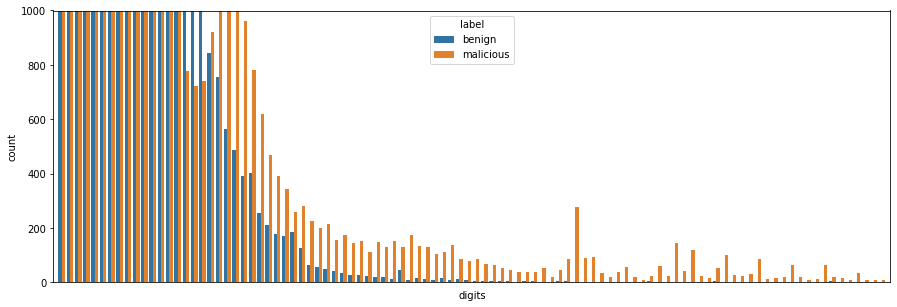

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='digits', hue="label", data=urldata)
plt.xlim(-1, 100)
plt.ylim(0, 1000)
plt.xticks([])

In [37]:
#統計 URL 中字母長度
def letter_count(url):
    num = 0
    for i in url:
        if i.isalpha():
            num += 1
    return num
urldata['letters'] = urldata['url'].apply(lambda x : letter_count(x))

* Count_letters：  URL 中字母的數量在識別惡意 URL 方面也起著重要作用。過少及過多都較容易為惡意網站。


([], [])

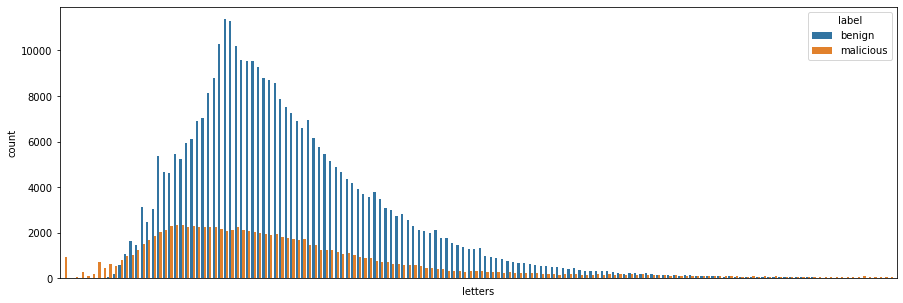

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='letters', hue="label", data=urldata)
plt.xlim(-1, 150)
plt.xticks([])

([], [])

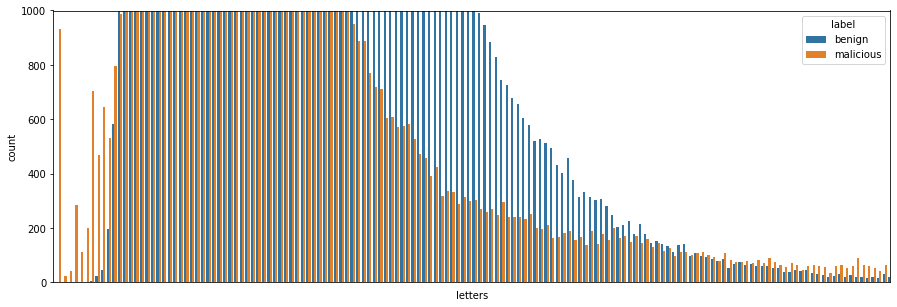

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='letters', hue="label", data=urldata)
plt.xlim(-1, 150)
plt.ylim(0, 1000)
plt.xticks([])

In [40]:
#統計 URL 中資料夾的層數
def count_dir(url):
    num = urlparse(url).path.count("/")
    return num
    
urldata['dir'] = urldata['url'].apply(lambda x : count_dir(x))

(-1.0, 24.0)

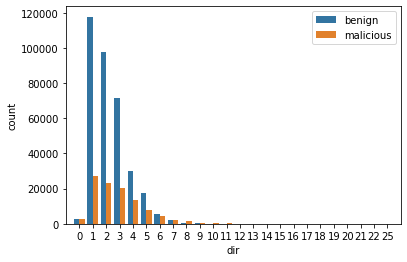

In [41]:
sns.countplot(x='dir', hue="label", data=urldata)
plt.legend(loc = 'upper right')
plt.xlim(-1, 24)

In [42]:
urldata.head()

,url,label,result,url_len,netloc_len,path_length,@,?,-,=,...,*,",",/,//,http,https,www,digits,letters,dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,0,0,2,1,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,0,0,2,1,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,0,0,2,1,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,0,0,2,1,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,0,0,2,1,1,1,1,0,20,0


**3. Binary Features**

* 通常網路攻擊者使用 IP 地址代替域名來隱藏網站的身份。此功能將檢查 URL 是否有 IPv4 地址

In [43]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5]))'  
        , url)  
    if match:
        return 1
    else:
        return 0
urldata['ip'] = urldata['url'].apply(lambda x: having_ip_address(x))

<AxesSubplot:xlabel='ip', ylabel='count'>

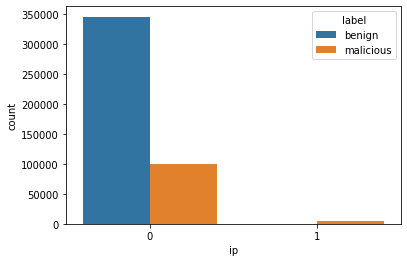

In [44]:
sns.countplot(x='ip', hue="label", data=urldata)

(0.0, 10000.0)

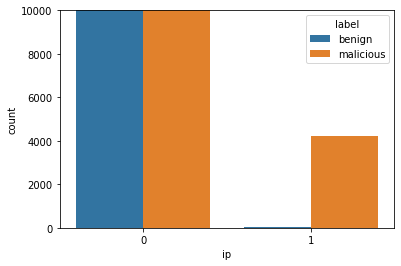

In [45]:
sns.countplot(x='ip', hue="label", data=urldata)
plt.ylim(0, 10000)

由於縮短網址具有隱匿原始網址的特性，使用者無法透過短網址的「外觀」得知真實網址，因此短網址便成為有心人士利用來散播電腦病毒及有害內容的管道，成為近年來社交工程攻擊的慣用工具之一。
* Short_url： 創建該特徵是為了識別URL是否使用了像bit這樣的URL縮短服務。\ly、goo.gl、go2l.ink 等。

In [46]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
urldata['Short_url'] = urldata['url'].apply(lambda x: Shortining_Service(x))

<AxesSubplot:xlabel='Short_url', ylabel='count'>

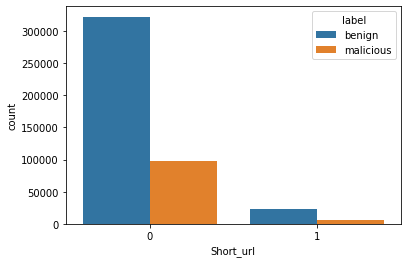

In [47]:
sns.countplot(x='Short_url', hue="label", data=urldata)

In [48]:
urldata.head()

,url,label,result,url_len,netloc_len,path_length,@,?,-,=,...,/,//,http,https,www,digits,letters,dir,ip,Short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,1,1,1,1,0,17,0,0,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,1,1,1,1,0,18,0,0,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,1,1,1,1,0,19,0,0,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,1,1,1,1,0,16,0,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,1,1,1,1,0,20,0,0,0


<AxesSubplot:>

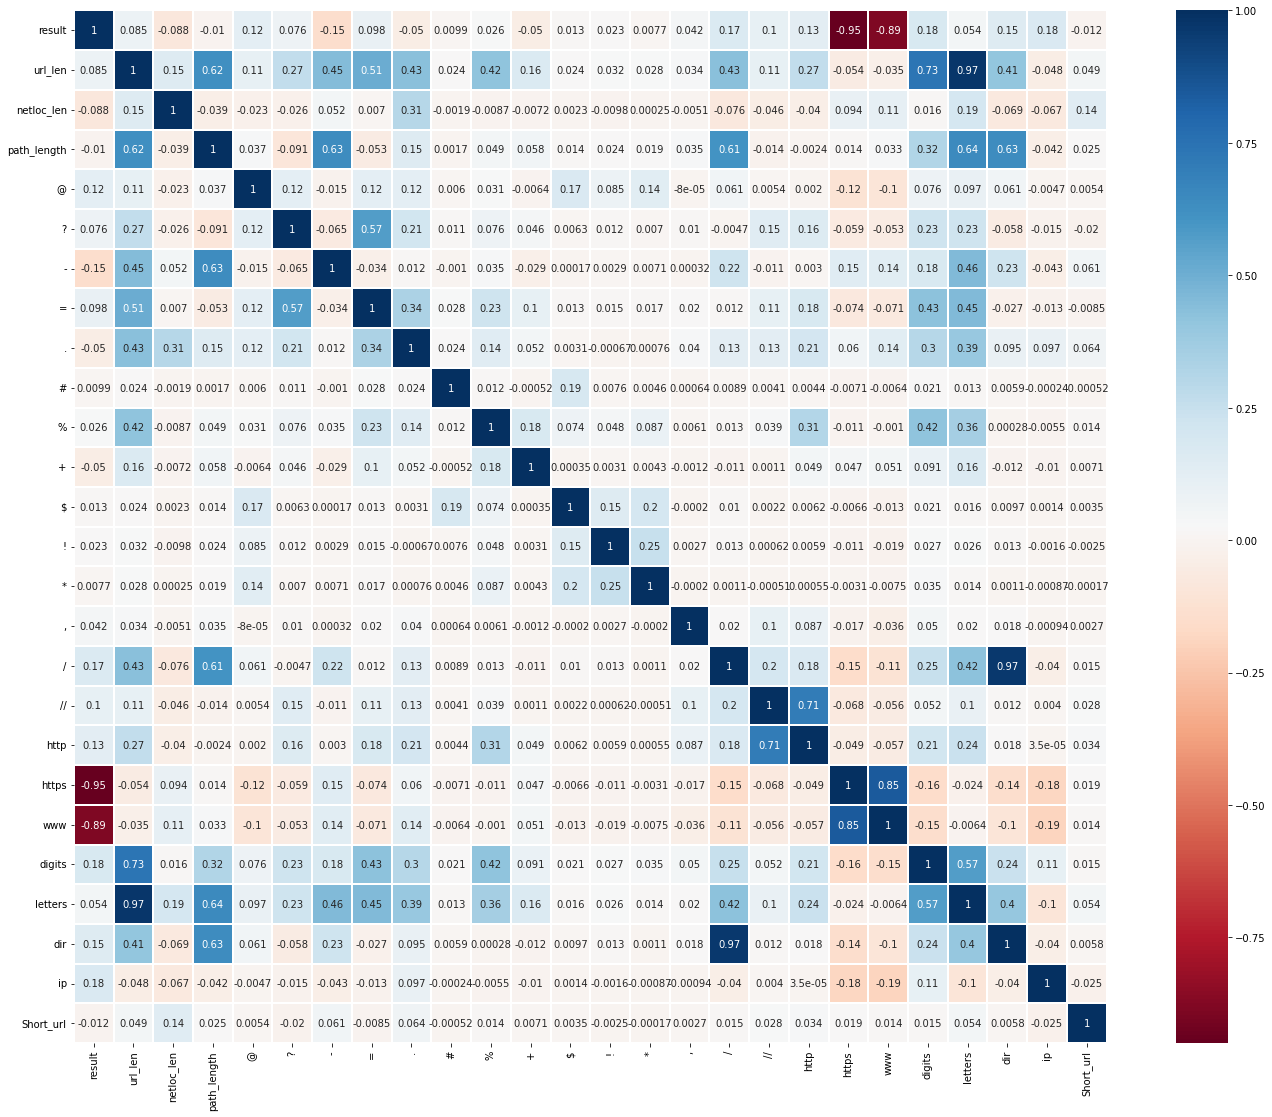

In [49]:
#各個特徵間的相關係數
colormap = plt.cm.RdBu
plt.figure(figsize=(25,19))
sns.heatmap(urldata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## **Train & Test Split**

In [50]:
X = urldata.drop(['url','label','result'],axis=1)
y = urldata['result']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## **Training models**
* KNN or k-Nearest Neighbors
* Logistic Regression
* Decision Tree
* RandomForest

### KNN or k-Nearest Neighbors

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Accuracy 96.29%
              Classification_report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     69052
           1       0.96      0.87      0.92     20984

    accuracy                           0.96     90036
   macro avg       0.96      0.93      0.95     90036
weighted avg       0.96      0.96      0.96     90036



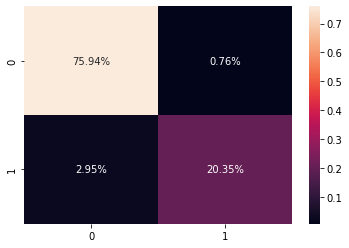

In [52]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
KNN_score = accuracy_score(pred, y_test)
print(KNeighborsClassifier)
print('Test Accuracy {:.2f}%'.format(KNN_score*100))
print('              Classification_report')
print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

In [53]:
np.sum(cf_matrix)

90036

### Logistic Regression

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Test Accuracy 99.62%
              Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69052
           1       0.99      0.99      0.99     20984

    accuracy                           1.00     90036
   macro avg       1.00      0.99      0.99     90036
weighted avg       1.00      1.00      1.00     90036



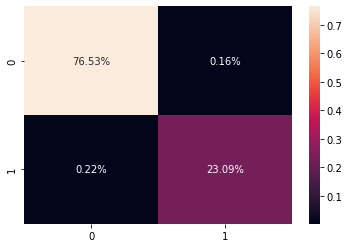

In [54]:
LR = LogisticRegression(max_iter=2000)
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
LR_score = accuracy_score(pred, y_test)
print(LogisticRegression)
print('Test Accuracy {:.2f}%'.format(LR_score*100))
print('              Classification_report')
print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### Decision Tree

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test Accuracy 99.63%
              Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69052
           1       0.99      0.99      0.99     20984

    accuracy                           1.00     90036
   macro avg       1.00      0.99      0.99     90036
weighted avg       1.00      1.00      1.00     90036



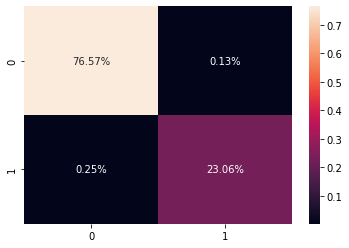

In [55]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
tree_score = accuracy_score(pred, y_test)
print(DecisionTreeClassifier)
print('Test Accuracy {:.2f}%'.format(tree_score*100))
print('              Classification_report')
print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### RandomForest

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Accuracy 99.71%
              Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69052
           1       1.00      0.99      0.99     20984

    accuracy                           1.00     90036
   macro avg       1.00      0.99      1.00     90036
weighted avg       1.00      1.00      1.00     90036



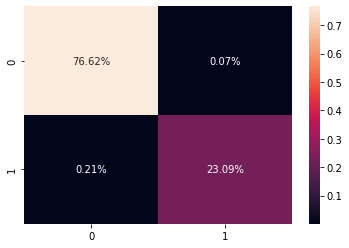

In [56]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
RF_score = accuracy_score(pred, y_test)
print(RandomForestClassifier)
print('Test Accuracy {:.2f}%'.format(RF_score*100))
print('              Classification_report')
print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()

## **Final Report**

In [57]:
report = pd.DataFrame({"Model":["K-Nearest Neighbors","Logistic Regression",
                        "Decision Tree","RandomForest"], 
                       "Accuracy":[KNN_score, LR_score, tree_score, RF_score]})

In [58]:
report

,Model,Accuracy
0,K-Nearest Neighbors,0.962893
1,Logistic Regression,0.996190
2,Decision Tree,0.996257
3,RandomForest,0.997146


<AxesSubplot:>

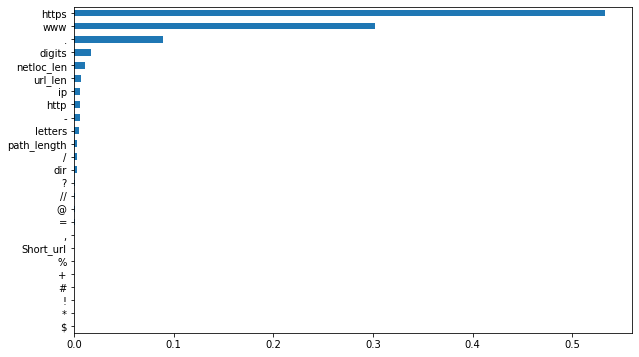

In [59]:
feat_importances = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))